In [279]:
## 비디오 게임 세일
# 1. 데이터 분석
# 2. 데이터 로드
# 3. 데이터 전처리
# 4. 데이터 정제
# 4-1. 목표 그래프 주제:
# 5. 그래프 생성

In [280]:
# 1. 데이터 분석
## - Rank:     랭킹
## - Name:     이름
## - Platform: 하드웨어
## - Year:     출시년도
## - Genre:    장르
## - Sales:    판매량

In [281]:
## import
import pandas as pd
import missingno as msno
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [282]:
# 2. 데이터 로드
DATA_PATH = './data/'
df = pd.read_csv(DATA_PATH + 'vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


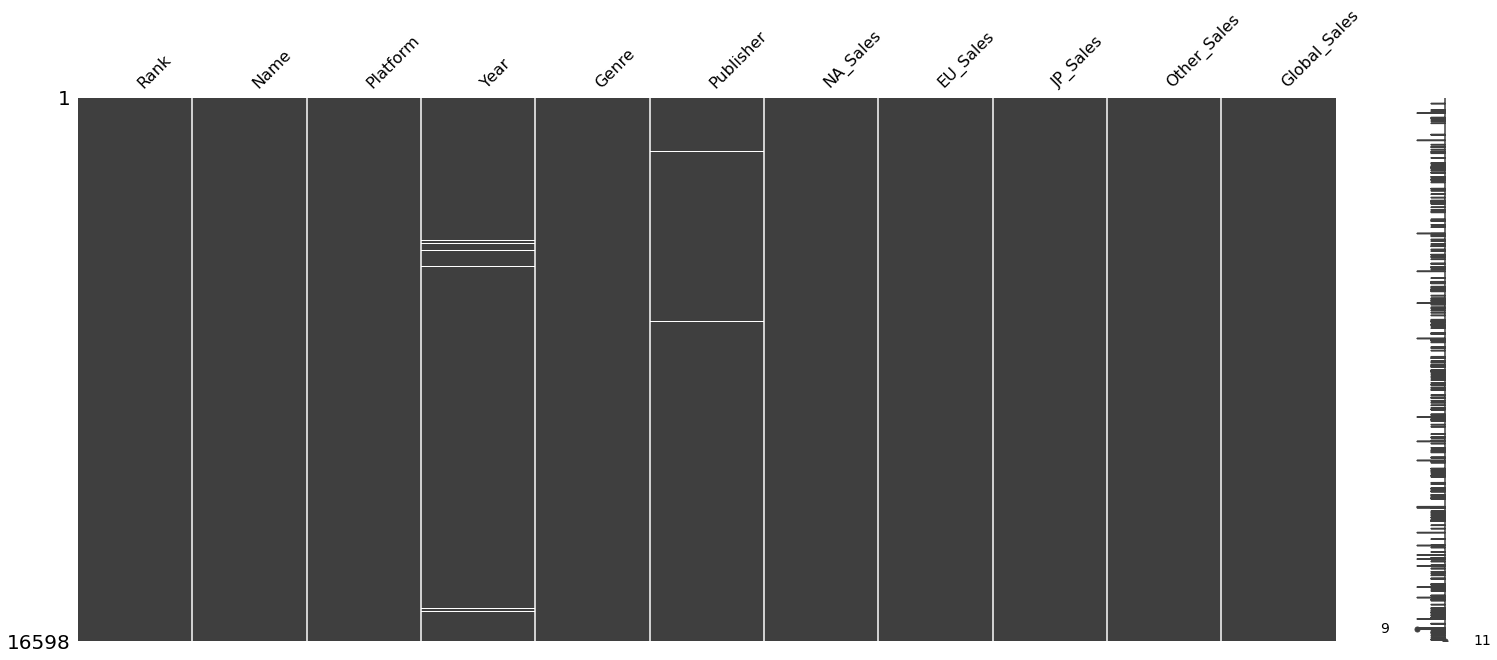

In [283]:
# 3. 데이터 전처리
msno.matrix(df)
attrs = df.columns
df['Year'] = df['Year'].fillna(0)

## 판매량 millions 단위 10^6 -> 10^3 k 단위 수정
df['Global_Sales'] = df['Global_Sales']
df['Year'] = df['Year'].map(lambda year: int(year))

In [284]:
# 4. 데이터 정제
# 4-1. 목표 그래프 주제: 출시 년도마다 각 게임 장르의 총 판매량
data = df[[ 'Genre', 'Year', 'Global_Sales']]
data_3d = data[(data.Year > 0)].groupby(['Year', 'Genre'], as_index = False)['Global_Sales'].agg('sum')
data_3d

,Year,Genre,Global_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.71
3,1980,Shooter,7.07
4,1980,Sports,0.49
...,...,...,...
384,2016,Sports,14.60
385,2016,Strategy,0.50
386,2017,Action,0.01
387,2017,Role-Playing,0.04


In [285]:
# x = 장르
# y = 판매량
# z = 년도

# 1. 장르별 판매량
data = df[[ 'Genre', 'Global_Sales' ]].groupby([ 'Genre' ], as_index = False)['Global_Sales'].agg('sum').reset_index()

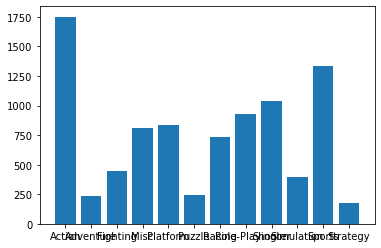

In [286]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = list(data['Genre'])
counts = list(data['Global_Sales'])

ax.bar(x, counts)

plt.show()

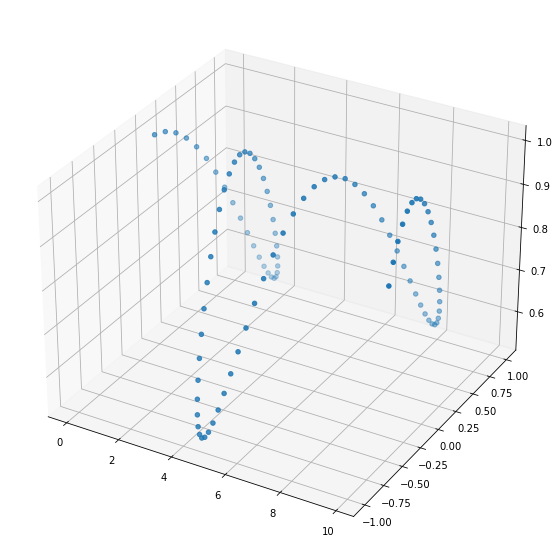

In [287]:
fig2 = plt.figure(figsize = (10, 10))
ax = fig2.add_subplot(111, projection='3d')

x = np.arange(0, 10, 0.1)
y = np.sin(x)
z = np.cos(y)

# ax.plot(x, y, z)
ax.scatter(x, y, z) ## 산점도

In [288]:
# ## 틀 생성
# fig3 = plt.figure(figsize = (10, 10))
# ax3 = fig3.add_subplot(111, projection='3d')
#
# ## y축 값
# ymin = np.min(list(data['Global_Sales']))
# ymax = np.max(list(data['Global_Sales']))
#
# ## z축 값
#
#
# ## 각 축의 범위 생성
# x_axis = list(data['Genre'])
# y_axis = np.arange(ymin, ymax, 1000)
# z_axis = list(data_3d['Year'])
#
#
# ax3.plot(x_axis, y_axis, z_axis)

   index  Year     Genre  Global_Sales
0      0  1980    Action          0.34
1      1  1980  Fighting          0.77
2      2  1980      Misc          2.71
3      3  1980   Shooter          7.07
4      4  1980    Sports          0.49


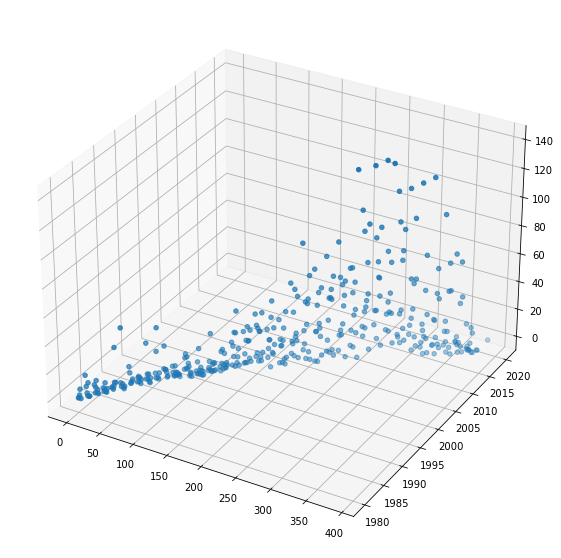

In [313]:
# 4-1. 목표 그래프 주제: 출시 년도마다 각 게임 장르의 총 판매량
# 데이터 범위 줄이기
data = df[[ 'Genre', 'Year', 'Global_Sales']]
data = data[(data.Year > 0)].groupby(['Year', 'Genre'], as_index = False)['Global_Sales'].agg('sum').reset_index()
print(data.head())

## 그래프 생성
fig4 = plt.figure(figsize = (10, 10))
ax = fig4.add_subplot(111, projection='3d')
# ax = fig4.add_subplot(2, 1, 1)

### 좌표 설정
# X = np.array(list(data['Genre'].unique()))
X = np.array(list(data['Genre'].index))
# Y = np.array(list(data['Year'].unique()))
Y = np.array(list(data['Year']))
# # Z =
Z = np.array(list(data['Global_Sales']))

ax.scatter(X, Y, Z)